In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [299]:
def cabinsplit(string):
    if isinstance(string, str):
        a,b,c=string.split(sep='/')
        return a,b,c
    else:
        return np.NaN,np.NaN,np.NaN

def feature_eng(train_df,test_df):
    l_train=len(train_df)
    joint_df=train_df.append(test_df)
    exp=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
    joint_df['TotalExpense']=joint_df[exp].sum(axis=1)
    #df['col_3'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)
    joint_df[:3]
    #separate deck/cabin number/port-starboard
    #separate 
    joint_df['Deck'],joint_df['CNumber'],joint_df['Side']=zip(*joint_df['Cabin'].map(cabinsplit,na_action=None)) #or apply with result type 'expand
    joint_df['FamilyName']=joint_df['Name'].map(lambda x:x.split()[-1],na_action='ignore')
    #now do the splitting again:
    train_out=joint_df[:l_train]
    test_out=joint_df[l_train:]
    return train_out,test_out

def familyname(string):
    return string.split

In [300]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [301]:
train,test=feature_eng(train,test)


In [302]:
#train[train['Name'].apply(lambda x: isinstance(x, float))]

In [303]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpense,Deck,CNumber,Side,FamilyName
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,A,98,P,Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,G,1499,S,Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,G,1500,S,Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,E,608,S,Hontichre


In [304]:
label='Transported'
features=list(train.keys())
features.remove(label)
features.remove('PassengerId')
print(features)

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'TotalExpense', 'Deck', 'CNumber', 'Side', 'FamilyName']


Selecting features

In [305]:
numeric_features=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
categorical_features=['CryoSleep','VIP','Destination','HomePlanet','Deck','Side']
#TODO: 'Cabin', 'Name'

In [306]:
def plot_survival(f,log=False,bins=None):
        # Get the variable to examine
        transported = train[train[label]==1][f]
        not_transported = train[train[label]==0][f]
        # Plot a histogram
        plt.hist([transported,not_transported],label=['transported', 'not_transported'],log=log,bins=bins)

        # Add titles and labels
        plt.title(f)
        plt.xlabel(f)
        plt.legend()
        plt.ylabel('Number')
        plt.show()

https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

https://medium.com/analytics-vidhya/create-a-grouped-bar-chart-with-matplotlib-and-pandas-9b021c97e0a

Using a pivot table to summarize categorical features:

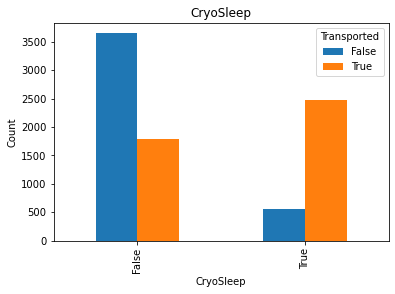

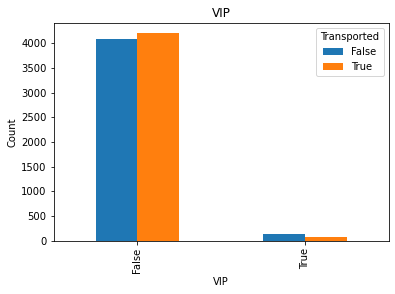

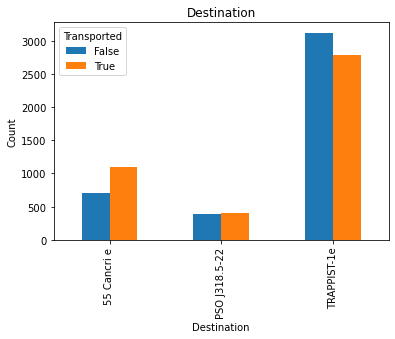

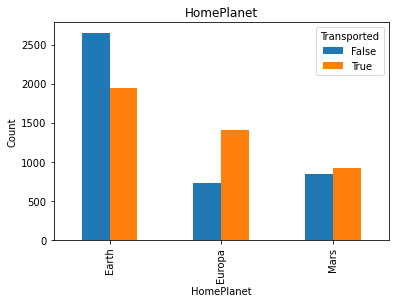

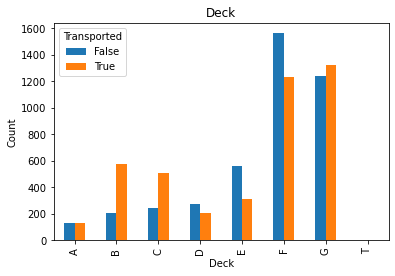

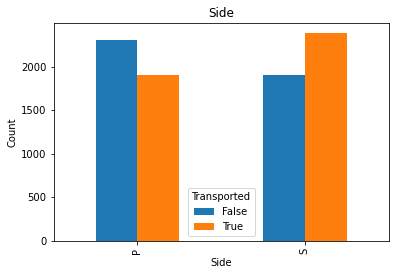

In [307]:

for f in categorical_features:
    df_pivot = pd.pivot_table(
        train, 
        index=f,
        columns="Transported",
        aggfunc='size'
    )
    ax = df_pivot.plot(kind="bar")
    ax.set_title(f)
    ax.set_ylabel('Count')

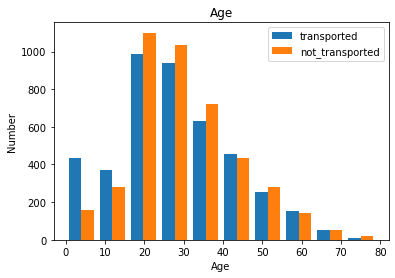

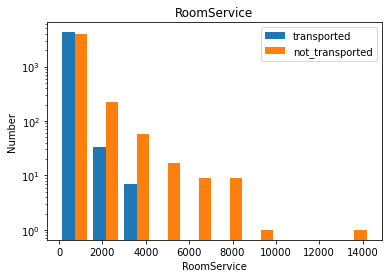

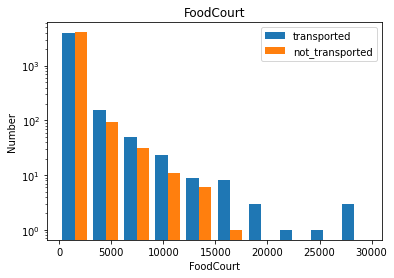

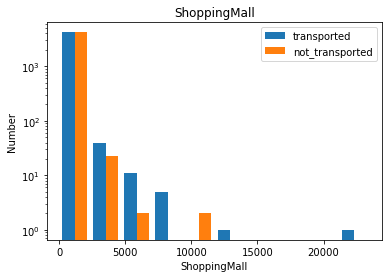

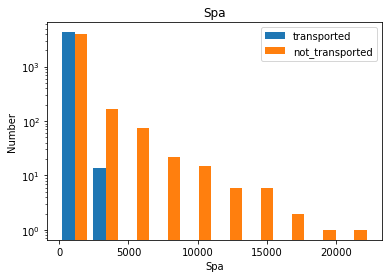

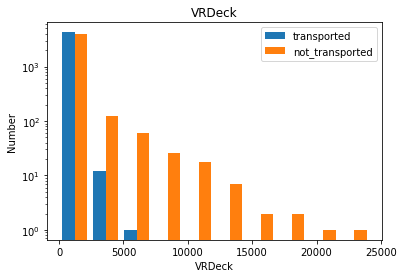

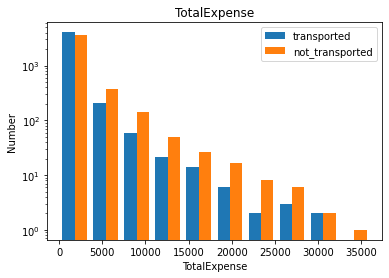

In [308]:
for f in numeric_features:
    if f == 'Age':
        plot_survival(f)
    else:
        plot_survival(f,log=True)

In [309]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [310]:
binned_features=[]

In [311]:
params = [
 {
    'clf':[RandomForestClassifier()],
    'clf__n_estimators' : [25,50, 100, 150,200]
 },
 {
   'clf':[AdaBoostClassifier()],
   'clf__learning_rate':[0.03,0.1, 0.5, 1.0],
   'clf__n_estimators' : [25,50, 100, 150,200,300]
 },
#  {
#   'clf':[GaussianProcessClassifier()],
#   'clf__max_iter_predict':[25,50,100]
#  }
 ]

In [312]:
y=train[label]
x=train.drop(label,axis=1)

In [313]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: object

In [314]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)


In [315]:
y_train,y_test=y_train.astype(int),y_test.astype(int)

In [316]:
# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_transformer = Pipeline(steps=[('inp',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

binned_transformer = Pipeline(steps=[('inp',SimpleImputer(strategy='mean')),('KBinsDiscretizer',KBinsDiscretizer(n_bins=10))])


# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin',binned_transformer,binned_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf', RandomForestClassifier(n_estimators=100))])

In [317]:
set_config(display='diagram')
gridsearch=GridSearchCV(verbose=1,estimator=pipeline,param_grid=params,scoring='accuracy',return_train_score=True,cv=3)


In [318]:
model = gridsearch.fit(x_train, (y_train))

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [319]:
gridsearch.best_score_

0.7869605276015187

In [320]:
gridsearch.best_params_

{'clf': AdaBoostClassifier(learning_rate=0.5, n_estimators=150),
 'clf__learning_rate': 0.5,
 'clf__n_estimators': 150}

In [321]:
gridsearch.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('inp',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck',
                                                   'TotalExpense']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CryoSleep', 'VIP',
                                                   'Destination', 'HomePlanet',
                                                   'Deck', 'Side']),
                                                 ('bin',
                                                  Pipeline(steps=[('inp',
                                                                   SimpleImputer()),
                                                                  ('KBinsDiscretizer',
                                                                   KBinsDiscretizer(n_bins=10))]),
                                                  [])])),
                ('clf',
                 AdaBoostClassifier(learning_rate=0.5, n_estimators=150))])

In [322]:
from sklearn.metrics import roc_auc_score,precision_score, recall_score, accuracy_score,roc_curve,confusion_matrix

Confusion Matrix:
 [[1304  424]
 [ 282 1468]] 

Accuracy: 0.79700977573318
Overall Precision: 0.7758985200845666
Overall Recall: 0.8388571428571429

AUC: 0.8795717592592592


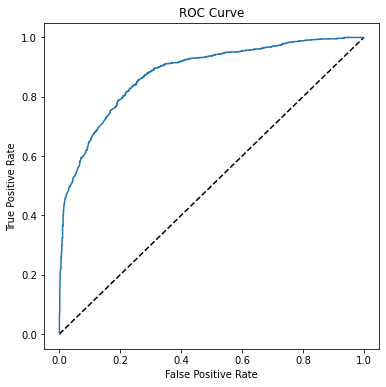

In [323]:
predictions = model.predict(x_test)
y_scores = model.predict_proba(x_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [324]:
chall_predictions=model.predict(test)
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpense,Deck,CNumber,Side,FamilyName
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,NaN,0.0,G,3,S,Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,NaN,2832.0,F,4,S,Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,NaN,0.0,C,0,S,Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,NaN,7418.0,C,1,S,Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,NaN,645.0,F,5,S,Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,0.0,G,1496,S,Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,1018.0,NaN,NaN,NaN,Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,0.0,D,296,P,Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,3203.0,D,297,P,Conale


In [325]:
from datetime import datetime
import os

In [326]:
savemodel=True

In [327]:
if savemodel:
    timestamp=datetime.today().strftime('%Y%m%d%H%M%S')
    models_folder= 'models'
    os.makedirs(models_folder,exist_ok=True)
    model_name= 'sp_titanic_'+ timestamp +'.joblib'
    modelpath= os.path.join(models_folder,model_name)
    from joblib import dump, load
    dump(model, modelpath)
    print('Saved ' , modelpath)

Saved  models\sp_titanic_20221111012438.joblib


In [328]:
chall_predictions

array([1, 0, 1, ..., 1, 1, 1])

In [329]:
sample=pd.DataFrame(test['PassengerId'])
sample['Transported'] = chall_predictions.astype(bool).tolist()
sample.to_csv('chall_predictions.csv',index=False)
sample

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
